In [1]:
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from my_code import model as m
from my_code import layers
from my_code import functions as f

# DATA

In [3]:
from pennylane import numpy as np
file_path = '../data/energies/Trial/Strings_Energies.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list, requires_grad=False)/1000
angles_list = np.array([f.string_to_angles(string) for string in string_list], requires_grad=False)

In [4]:
X, Y = angles_list, score_list

# Model

## Define

In [5]:
circuit_layers = \
    [layers.angle_preparation()] + \
    [layers.rotationX_layer(), layers.rotationZ_layer(), layers.rotationZZ_layer()] * 50 +  \
    [layers.mesurament(qubits=[0])]

In [6]:
import pennylane as qml
SCORE_PREDICTOR = m.model(
    n_qubits = 12, 
    circuit_layers = circuit_layers
)

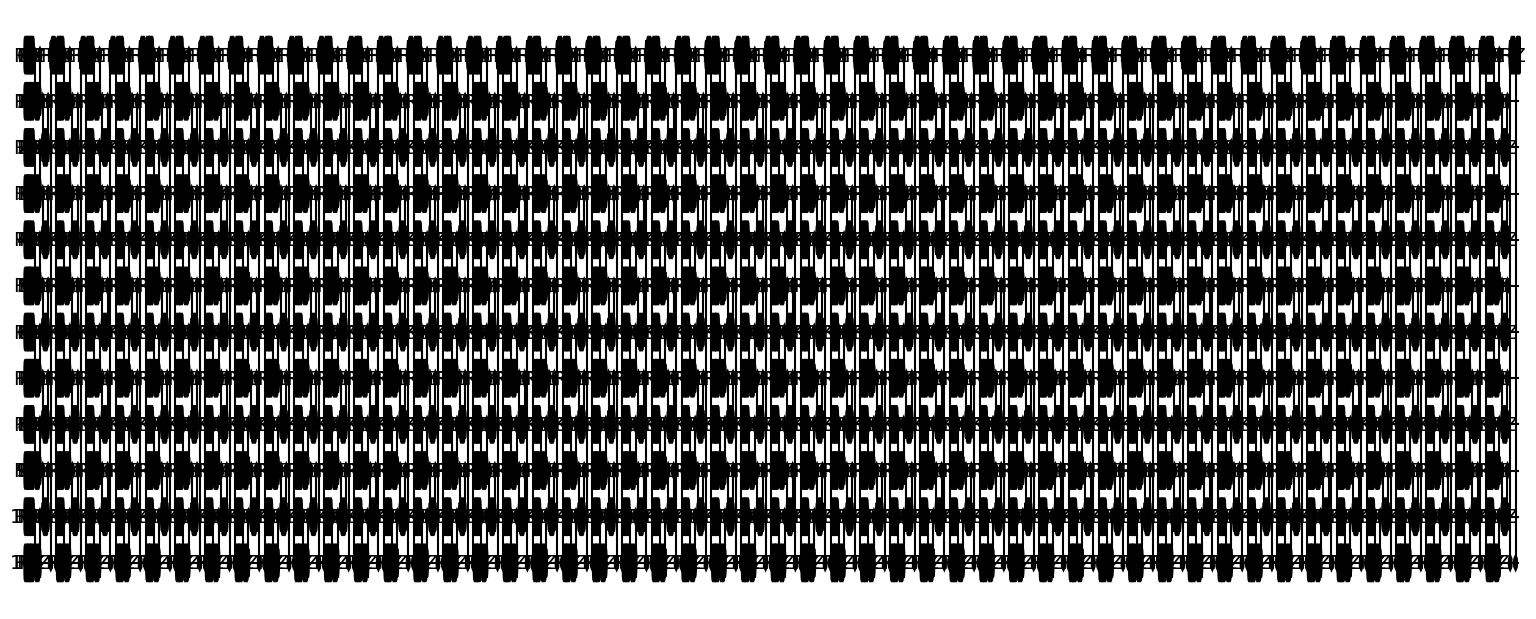

In [7]:
SCORE_PREDICTOR.draw_circuit(size=(15, 6))

## Train

In [8]:
SCORE_PREDICTOR.set_data(    
    data_X = X, 
    data_Y = Y, 
    # data_validation = data_validation
)

In [9]:
np.random.permutation(50)

tensor([47,  4, 22,  8, 12, 17, 29, 14, 34, 27,  3, 30, 44, 40, 33, 24,
         7,  1, 49, 48, 13, 32, 39, 25, 43, 19,  2, 15, 23, 36,  0, 45,
        37, 11, 31, 16,  9, 42, 46,  5, 38, 10,  6, 20, 26, 18, 41, 35,
        28, 21], requires_grad=True)

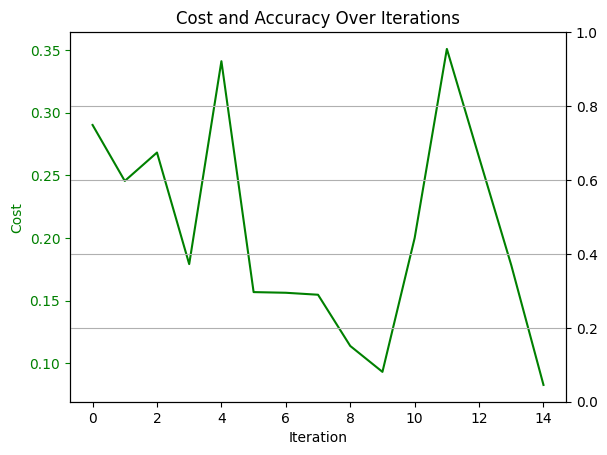

Epoch: 0 | Iter:    15 | Cost: 0.0827707 | Accuracy: 0.9172293 
Epoch: 0 | Iter:    16 | Cost: 0.1368896 | Accuracy: 0.8631104 
Epoch: 0 | Iter:    17 | Cost: 0.2416243 | Accuracy: 0.7583757 
Epoch: 0 | Iter:    18 | Cost: 0.1314645 | Accuracy: 0.8685355 
Epoch: 0 | Iter:    19 | Cost: 0.2026582 | Accuracy: 0.7973418 


In [10]:
SCORE_PREDICTOR.train(
    epochs = 100,     
    batch_size = 10,
    optimizer = qml.SPSAOptimizer(maxiter=1000, c=0.15, a=0.2),
    initialize_params=True, 
    plot_options={
        'accuracy': False, 
        'accuracy_validation': False, 
        'plot_every': 5
    }
)

## Try

In [ ]:
# take 20 items from the data set randomly

import random
random.seed(42)
random_index = random.sample(range(0, len(X)), 20)
X_test = X[random_index]
Y_test = Y[random_index]

# predict the score for the 20 items
Y_predicted = [SCORE_PREDICTOR.predict(x) for x in X_test]

In [ ]:
# print the results
for i in range(len(X_test)):
    print("String: {} \tScore: {:.3f} \tPredicted: {:.3f} \tDiference: {:.3f}".format(i, Y_test[i].item(), Y_predicted[i].item(), abs(Y_test[i].item() - Y_predicted[i].item())))

String: 0 	Score: 0.300 	Predicted: 0.517 	Diference: 0.217
String: 1 	Score: 0.667 	Predicted: 0.295 	Diference: 0.372
String: 2 	Score: 0.244 	Predicted: 0.366 	Diference: 0.121
String: 3 	Score: 0.514 	Predicted: 0.332 	Diference: 0.182
String: 4 	Score: 0.006 	Predicted: 0.497 	Diference: 0.491
String: 5 	Score: 0.772 	Predicted: 0.371 	Diference: 0.400
String: 6 	Score: 0.316 	Predicted: 0.459 	Diference: 0.142
String: 7 	Score: 0.581 	Predicted: 0.461 	Diference: 0.119
String: 8 	Score: 0.475 	Predicted: 0.464 	Diference: 0.010
String: 9 	Score: 0.404 	Predicted: 0.440 	Diference: 0.036
String: 10 	Score: 0.587 	Predicted: 0.335 	Diference: 0.252
String: 11 	Score: 0.331 	Predicted: 0.396 	Diference: 0.065
String: 12 	Score: 0.677 	Predicted: 0.420 	Diference: 0.257
String: 13 	Score: 0.153 	Predicted: 0.469 	Diference: 0.315
String: 14 	Score: 0.270 	Predicted: 0.408 	Diference: 0.138
String: 15 	Score: 0.119 	Predicted: 0.313 	Diference: 0.195
String: 16 	Score: 0.449 	Predicte